In [71]:
import tensorflow as tf
from tensorflow import keras
tf.reset_default_graph()
tf.set_random_seed(1)
import matplotlib.pyplot as plt

In [94]:
tf.reset_default_graph()

In [121]:
(train_x,train_y),(test_x,test_y)=keras.datasets.mnist.load_data()

In [96]:
train_x.shape


(60000, 28, 28)

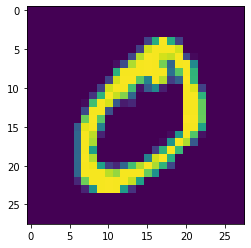

In [97]:
plt.imshow(train_x[1])

In [120]:

train_y=keras.utils.to_categorical(train_y,num_classes=10)
test_y=keras.utils.to_categorical(test_y,num_classes=10)

In [99]:
train_y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [100]:

model=keras.Sequential()
model.add(keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(keras.layers.BatchNormalization())

In [101]:
model.add(keras.layers.Dense(200,activation='sigmoid'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(100,activation='sigmoid'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(50,activation='sigmoid'))
model.add(keras.layers.Dense(25,activation='sigmoid'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [102]:
adam = keras.optimizers.Adam(lr=0.03,decay=0.01)#learning rate decay 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5

In [104]:
model.fit(train_x,train_y,
         validation_data=(test_x,test_y),
         epochs=5,
         batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 182us/sample - loss: 0.8460 - acc: 0.7628 - val_loss: 0.3337 - val_acc: 0.9157
Epoch 2/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.3308 - acc: 0.9094 - val_loss: 0.2023 - val_acc: 0.9501
Epoch 3/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.2431 - acc: 0.9321 - val_loss: 0.1645 - val_acc: 0.9563
Epoch 4/5
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2031 - acc: 0.9423 - val_loss: 0.1501 - val_acc: 0.9594
Epoch 5/5
60000/60000 [==============================] - 11s 188us/sample - loss: 0.1783 - acc: 0.9485 - val_loss: 0.1349 - val_acc: 0.9628


In [105]:
model.evaluate(test_x,test_y)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.1349 - acc: 0.9628


[0.13494306290745736, 0.9628]

In [106]:
model.predict(test_x[:1,:,:])

array([[1.5635882e-05, 6.6732342e-04, 9.1822853e-04, 1.3060252e-03,
        7.0526166e-04, 1.2963831e-04, 2.0483612e-05, 9.9295217e-01,
        1.5102452e-04, 3.1341794e-03]], dtype=float32)

In [126]:
model.predict_classes(test_x[1:3,:,:])

array([2, 1])

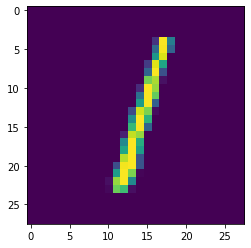

In [125]:
plt.imshow(test_x[2])

In [123]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)